#Speech to Text Translation with CoVoST Data

## CoVoST Data
CoVoST Release-1 covering translation from 11 languages to English, while CoVoST Release-2 covering translations from 21 languages into English and from English into 15 languages. The data orpus was released with aim to foster research in massive multilingual ST and ST for low 
resource language pairs.

A comparison CoVoST2 vs other available multilingual data resource

<img src='http://drive.google.com/uc?export=view&id=193cY6xC7JcA8qbecDgs4qJzlRs6W0Nkw' width=600 height=200>

##Problem: 
The objective of this Self Case Study is conceptual and practical study of the research paper on CoVoST Data Corpus for multilingual Speech-to-text translation task. 
I will be experimenting translation for low-resource language set, and particularly languages from Indo European family


## Languages Studied here:
In this study, we will we working with Indo European family, which is also the most familiar and studied language family. There are several branches to it, and based on the available data, have picked here its five sub-branches:
- **Italic(Ibero-Romance languages)**: Catalan
- **Germanic**: Swedish
- **Baltic**: Latvian
- **Slavic**: Slovenian
- **Celtic**: Welsh

Note: these fall under the category of low-resource languages, except for Catalan


##Language Families- An Introduction

*Courtesy- Wikipedia*

A language family is a group of languages related through descent from a common ancestral language or parental language, called the proto-language of that family. The term "family" reflects the tree model of language origination in historical linguistics, which makes use of a metaphor comparing languages to people in a biological family tree, or in a subsequent modification, to species in a phylogenetic tree of evolutionary taxonomy. Linguists therefore describe the daughter languages within a language family as being genetically related.


Here is link to precisely classification Language families
http://www.italiantechnicaltranslations.com/language-family-groups.htm

To learn more in detail about the languages families, check this link
https://www.linguisticsnetwork.com/an-introduction-to-language-families/

      
<img src='http://drive.google.com/uc?export=view&id=18D3wfUqZyXa47Iwup6wYpBHZDyU6tcst' width="400" height="300">`




## CoVoST - Data Statistics Overview

<img src='http://drive.google.com/uc?export=view&id=1FcFOnPALzmFQjM_QnYfKdP-QwcNCMN2C'>


## Mapping the problem to Machine learning problem

A Sequence to Sequence prediction problem
- transcribing audio to its respective text
- translating multilingual texts to English


### Metric
 - CER/WER
 - BLEU score

## Data

Here we will be dealing with two types of data:
1. audio
2. text



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import csv

#Loading the Common Voice files

Defining function to load CoVo tar

In [ ]:
#untaring common voice tar in specified directory

data_path = '/content/drive/MyDrive/project_covost/data/'

def load_covo_files(covo_tar_path, string):

      #creating directory
      dir = 'audio_'+ string
      path = os.path.join(data_path, 'audio_'+string)
      if not os.path.exists(path):
          os.mkdir(path)
      print("Directory path created/checked")

      #untar file
      print(f"Untarring CoVo tar for lang-'{string}'....")
      untar_cmd = f"tar -xvf {covo_tar_path} -C {path}"
      untarred = os.system(untar_cmd)
      print(f"Untarring process completed, exit code:{untarred}")

Downloading CoVo files for lang-Slovenian

In [ ]:
#downloading CoVo tar file for Slovenian language

%%time 
covo_tar = '/content/drive/MyDrive/project_covost/data/covo/sl.tar'
load_covo_files(covo_tar, 'Sl')

Directory path created/checked
Untarring CoVo tar for lang-'Sl'....
Untarring process completed, exit code:0
CPU times: user 339 ms, sys: 49.9 ms, total: 389 ms
Wall time: 1min 7s


Downloading CoVo files for lang-Swedish

In [ ]:
#downloading CoVo tar file for Swedish language
%%time 
covo_tar = '/content/drive/MyDrive/project_covost/data/covo/sv-SE.tar'
load_covo_files(covo_tar, 'Sv')

Directory path created/checked
Untarring CoVo tar for lang-'Sv'....
Untarring process completed, exit code:0
CPU times: user 277 ms, sys: 54.6 ms, total: 331 ms
Wall time: 1min 4s


Downloading CoVo files for lang-Latvian

In [ ]:
#downloading CoVo tar file for Latvian language

%%time 
covo_tar = '/content/drive/MyDrive/project_covost/data/covo/lv.tar'
load_covo_files(covo_tar, 'Lv')

Directory path created/checked
Untarring CoVo tar for lang-'Lv'....
Untarring process completed, exit code:0
CPU times: user 362 ms, sys: 60.3 ms, total: 422 ms
Wall time: 1min 10s


Downloading CoVo files for lang-Welsh

In [ ]:
#downloading CoVo tar file for Welsh language

%%time 
covo_tar = '/content/drive/MyDrive/project_covost/data/covo/cy.tar'
load_covo_files(covo_tar, 'Cy')

Directory path created/checked
Untarring CoVo tar for lang-'Cy'....
Untarring process completed, exit code:0
CPU times: user 6.64 s, sys: 691 ms, total: 7.34 s
Wall time: 19min 2s


Downloading CoVo files for lang-Catalan

In [ ]:
#downloading CoVo tar file for Welsh language

%%time 
covo_tar = '/content/drive/MyDrive/project_covost/data/covo/cy.tar'
load_covo_files(covo_tar, 'Ca')

###Lets explore the Common Voice data

This metadata is collected from the Common Voice. We can interpret how the data is distributed by size, audio_hrs, gender, age for our language of interest

In [2]:
cv_data = pd.read_csv('/content/drive/MyDrive/project_covost/metadata.csv', encoding='unicode_escape', engine='python')

In [3]:
cv_data

,lang,size,version,validated_hrs,total_hrs,#_voices,accent,male,female,<19,20-29,30-39,40-49,50-59,60-69,70-79
0,Sv,0.154,sv-SE_6h_2019-12-10,5,6,99,NA,74,8,14,18,28,5,16.0,NaN,NaN
1,Cy,2.000,cy_77h_2019-12-10,59,77,1149,43% Y Deyrnas Unedig Cymraeg,29,18,1,8,9,12,7.0,8.0,1.0
2,Sl,0.175,sl_6h_2019-12-10,3,6,51,NA,80,16,13,67,1,1,13.0,NaN,NaN
3,Lv,0.161,lv_6h_2019-12-10,4,6,86,NA,64,17,4,13,60,4,NaN,NaN,NaN
4,Ca,8.000,ca_295h_2019-12-10,245,295,3724,"58% central, 7% valencià, 6% nord-occidental, ...",43,35,1,10,14,19,22.0,11.0,NaN


In [35]:
cv_data.iloc[0].iloc[9:-1].index

Index(['<19', '20-29', '30-39', '40-49', '50-59', '60-69'], dtype='object')

In [34]:
cv_data.iloc[0].iloc[9:-1].values

array([14, 18, 28, 5, 16.0, nan], dtype=object)

**Accent**

Observations: From the table, we observe that accent data only for lang Catalan and Welsh. We also observe that we have multiple accent audio data for Catalan

**Data size, audio hrs, number of voices**

In [11]:
sns.set(style="ticks")
sns.set_style("darkgrid")

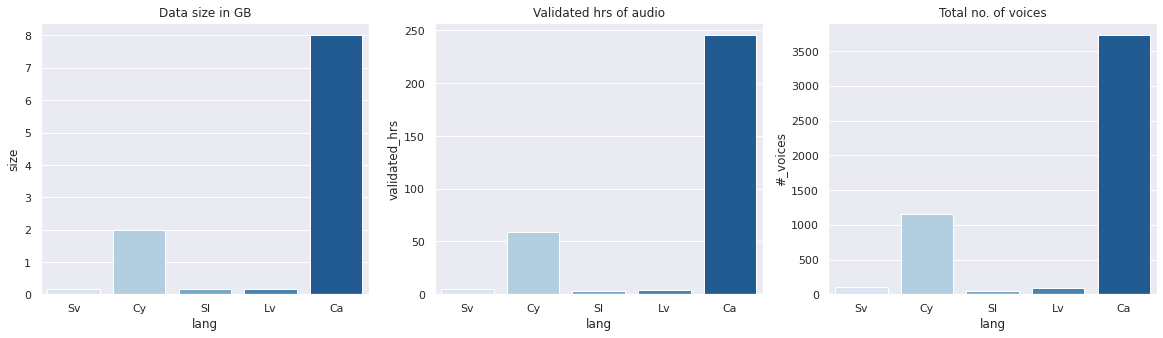

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(x='lang', y='size', data=cv_data, palette = "Blues", ax=axs[0])
sns.barplot(x='lang', y='validated_hrs', data=cv_data, palette = "Blues", ax=axs[1])
sns.barplot(x='lang', y='#_voices', data=cv_data, palette = "Blues", ax=axs[2])
axs[0].set_title("Data size in GB")
axs[1].set_title("Validated hrs of audio")
axs[2].set_title("Total no. of voices")
plt.show()

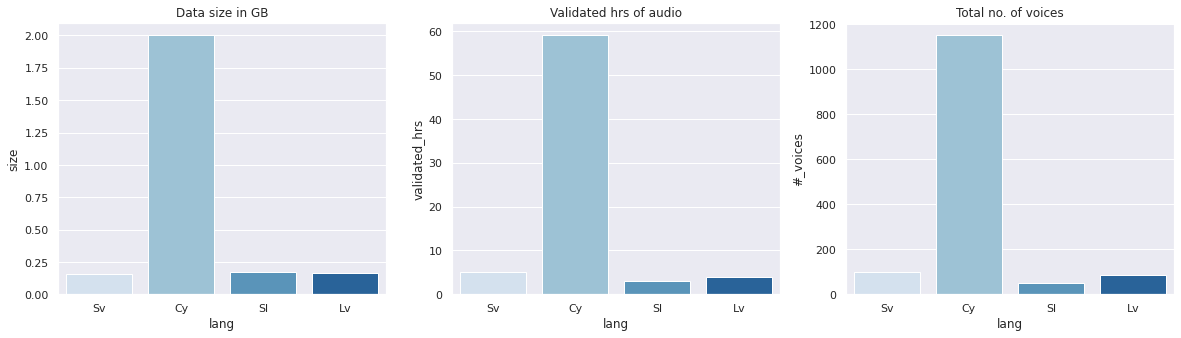

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(x='lang', y='size', data=cv_data, palette = "Blues", ax=axs[0])
sns.barplot(x='lang', y='validated_hrs', data=cv_data, palette = "Blues", ax=axs[1])
sns.barplot(x='lang', y='#_voices', data=cv_data, palette = "Blues", ax=axs[2])
axs[0].set_title("Data size in GB")
axs[1].set_title("Validated hrs of audio")
axs[2].set_title("Total no. of voices")
plt.show()

We observe that Cy-Welsh lang is big size wise, also has the highest validated audio hrs data, and also high number of voices

**Gender**

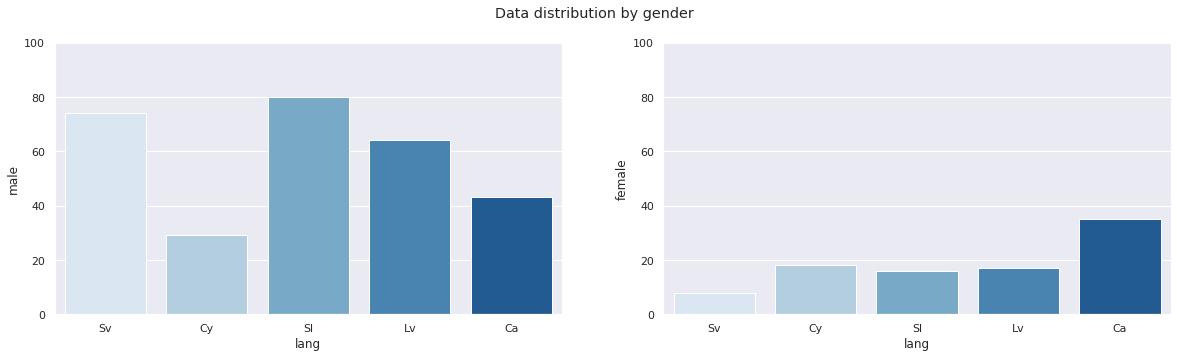

In [13]:
#gender distribution in the data
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(x='lang', y='male', data=cv_data, palette = "Blues", ax=axs[0])
sns.barplot(x='lang', y='female', data=cv_data, palette = "Blues", ax=axs[1])
axs[0].set_ylim([0, 100])
axs[1].set_ylim([0, 100])
plt.suptitle("Data distribution by gender")
plt.show()

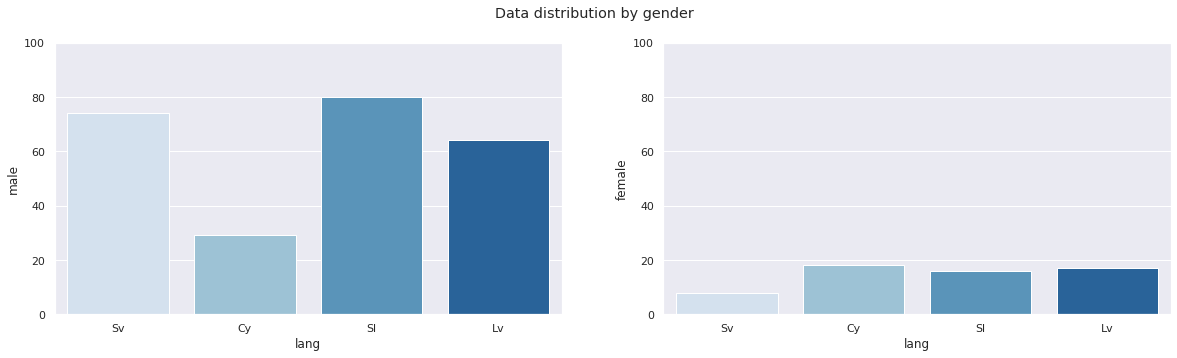

In [ ]:
#gender distribution in the data
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(x='lang', y='male', data=cv_data, palette = "Blues", ax=axs[0])
sns.barplot(x='lang', y='female', data=cv_data, palette = "Blues", ax=axs[1])
axs[0].set_ylim([0, 100])
axs[1].set_ylim([0, 100])
plt.suptitle("Data distribution by gender")
plt.show()

Observations:
- there is more contribution of male voice for all 4 languages compared to female voice

**Age**

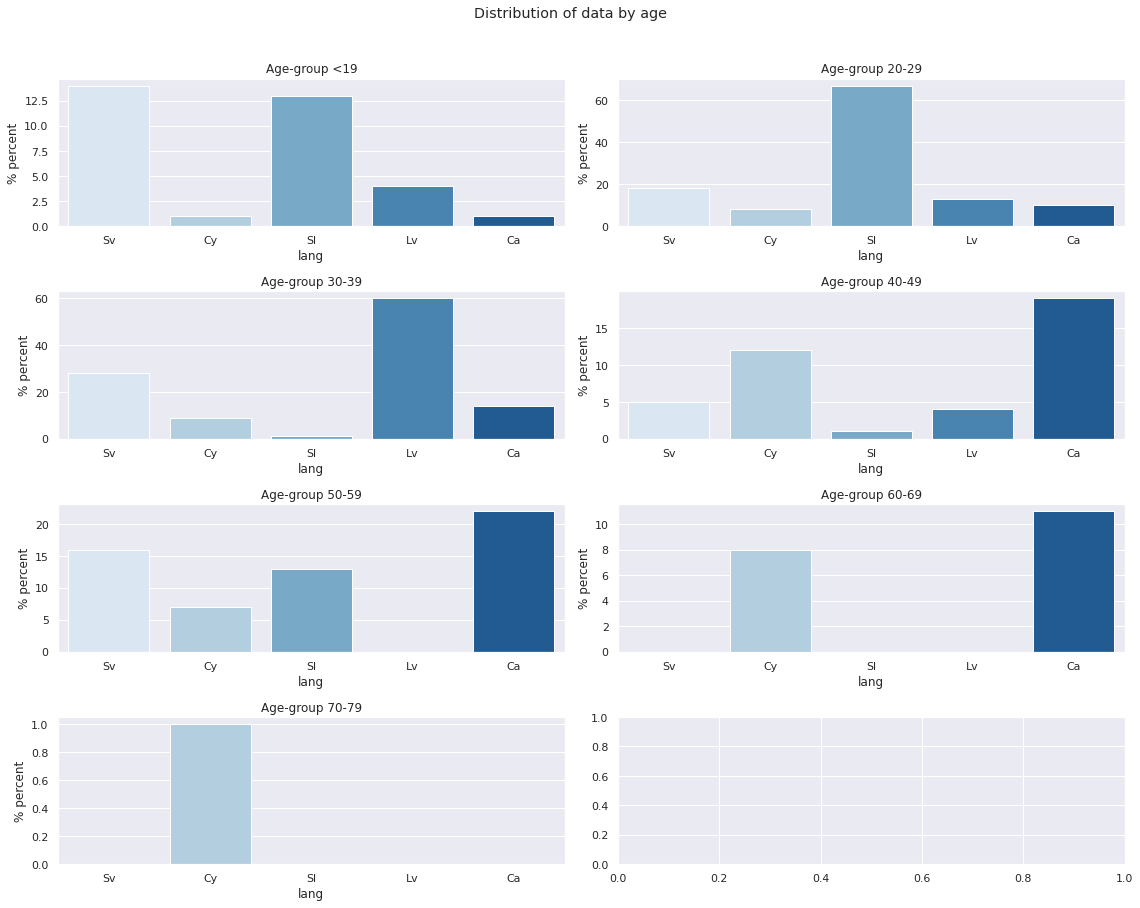

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(16, 12))
plt.suptitle("Distribution of data by age", y=1.05)
axs = axs.ravel()
age=['<19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
for e, i in enumerate(age):
  sns.barplot(x='lang', y=i, data=cv_data, palette = "Blues", ax=axs[e])
  axs[e].set_title(f"Age-group {age[e]}")
  axs[e].set_ylabel("% percent")
plt.tight_layout()
plt.show()

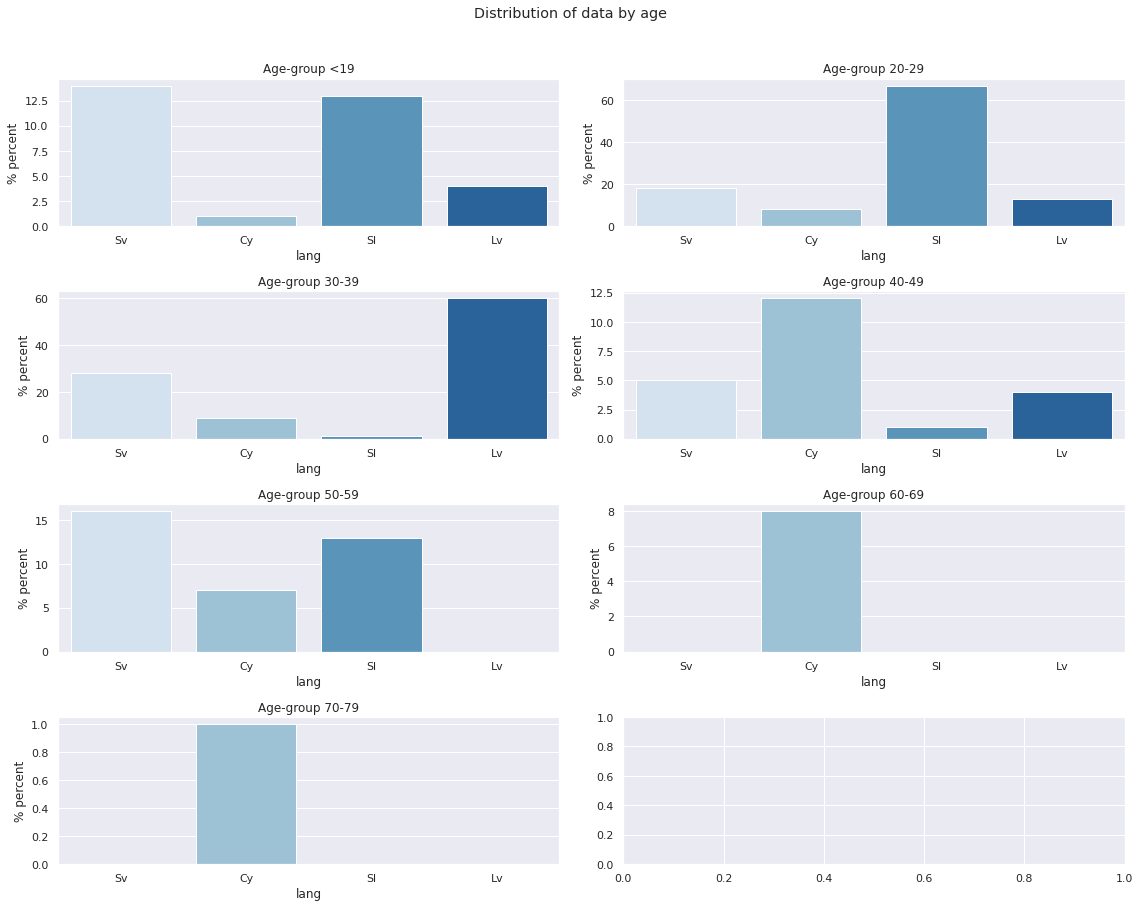

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(16, 12))
plt.suptitle("Distribution of data by age", y=1.05)
axs = axs.ravel()
age=['<19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
for e, i in enumerate(age):
  sns.barplot(x='lang', y=i, data=cv_data, palette = "Blues", ax=axs[e])
  axs[e].set_title(f"Age-group {age[e]}")
  axs[e].set_ylabel("% percent")
plt.tight_layout()
plt.show()

Observation:
- Most audio data comes from Age group 20-29 and 30-39, and is same for all the four languages. Followed by group 50-59
- Slovenian - most data comes from 20-29 age group
- Latvian - from 30-39 group
- Welsh - from across all age groups
- Swedish - also from all age groups except elderly
- Among elderly, the contribution comes for Welsh lang only

### Slovenian Data Analysis

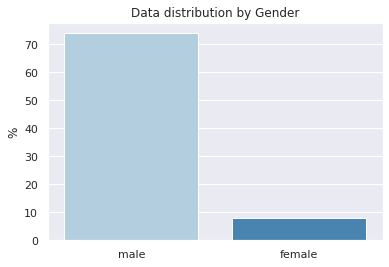

In [46]:

sns.barplot(x=['male', 'female'], y=cv_data.iloc[0][['male', 'female']], palette = "Blues")
plt.ylabel('%')
plt.title("Data distribution by Gender")
plt.show()

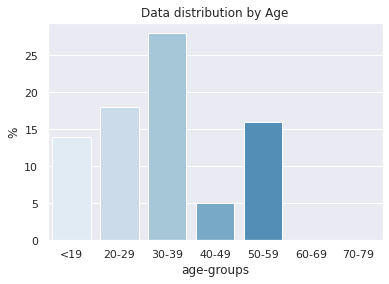

In [51]:

sns.barplot(x=cv_data.iloc[0].iloc[9:].index, y=cv_data.iloc[0].iloc[9:].values, palette = "Blues")
plt.ylabel('%')
plt.xlabel('age-groups')
plt.title("Data distribution by Age")
plt.show()

In [ ]:
sns.barplot(x=['male', 'female'], y=cv_data.iloc[0][['male', 'female']], palette = "Blues")
plt.ylabel('%')
plt.title("Data distribution by gender")
plt.show()

That was a general overview about the Common Voice data

## Validated_tsv file from Common Voice

data fields:
- client_id
- path
- sentence
- up_votes
- down_votes
- age
- gender
- accent

We already saw the distribution od Common Voice data by data size, validated audio hrs, gender, age.

The fields imporatnt to us for future processing of the data are:
- client_id: id of the client
- path: audio file
- sentence: transcript of the audio


Below are sample views from the respective lang dataframes. We can look at the sentence field to get an idea of the language. We will view this transcript alongside the audio in latter section.

**Slovenian**

In [ ]:
path = '/content/drive/MyDrive/project_covost/data/audio_Sl/validated.tsv'
df_sl = pd.read_csv(path, sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
df_sl.head(2)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,11e624bb4deec714bb02c069da72db856e980b6b950103...,common_voice_sl_18177874.mp3,Še tako dolga pot se začne s prvim korakom.,2,0,,,
1,6b4e702c510ad10adcf12b84acd9a35581cec369d2556f...,common_voice_sl_18168106.mp3,"Hudič tja, kamor ne more sam, pošlje vino.",2,0,fifties,male,


In [ ]:
print(f"Shape of the Slovenian CoVo Validated_tsv data: {df_sl.shape}")

Shape of the Slovenian CoVo Validated_tsv data: (2972, 8)


**Swedish**

In [ ]:
path = '/content/drive/MyDrive/project_covost/data/audio_Sv/validated.tsv'
df_sv = pd.read_csv(path, sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
df_sv.head(2)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,ebdeca96ebf4ffb75f048d23d985d1fbb93ba9dc2cf7dd...,common_voice_sv-SE_20197015.mp3,Vad vill du att jag ska säga?,2,0,,,
1,e54fc2fd84616be2354d19503ac2e0ff8c58a65e82b0fb...,common_voice_sv-SE_20160055.mp3,Jag lovar att jag kommer efter.,2,0,,,


In [ ]:
print(f"Shape of the Swedish CoVo Validated_tsv data: {df_sv.shape}")

Shape of the Swedish CoVo Validated_tsv data: (5898, 8)


**Latvian**

In [ ]:
path = '/content/drive/MyDrive/project_covost/data/audio_Lv/validated.tsv'
df_lv = pd.read_csv(path, sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
df_lv.head(2)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,348d0215801a7c05ee07d009118f5d21e3b4a8a7d753c8...,common_voice_lv_19409371.mp3,"Piedod, piedod. Vai sāp?",2,0,,,
1,b2a11379f1e979c6d5a9462b6630ca4d50e59cf3890811...,common_voice_lv_19869505.mp3,"Tu zini, tev būs jānāk pakaļ.",2,0,thirties,male,


In [ ]:
print(f"Shape of the Latvian CoVo Validated_tsv data: {df_lv.shape}")

Shape of the Latvian CoVo Validated_tsv data: (5098, 8)


**Welsh**

In [ ]:
path = '/content/drive/MyDrive/project_covost/data/audio_Cy/validated.tsv'
df_cy = pd.read_csv(path, sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
df_cy.head(2)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,0b1e4d3476c43a82a81cff9098ea2c3fb2ea9e9a0c373f...,common_voice_cy_18357273.mp3,Rhedais i ffwrdd heb ddweud dim wrthi am beth ...,2,0,,,
1,0cc7120b6eac432b4ede7b1ca4a212cb2b327ac20f4b3a...,common_voice_cy_19132010.mp3,Faint mae ystafell sengl yn ei gostio?,2,0,,,


In [ ]:
print(f"Shape of the Welsh CoVo Validated_tsv data: {df_cy.shape}")

Shape of the Welsh CoVo Validated_tsv data: (47059, 8)


**Catalan**

In [ ]:
path = '/content/drive/MyDrive/project_covost/data/audio_Ca/validated.tsv'
df_ca = pd.read_csv(path, sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
df_ca.head(2)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,03de40b6ecf87f9e1f42719a857b2fbf3b93179bf443e7...,common_voice_ca_19034690.mp3,"""Supervisa l'emissió de les resolucions de con...",2,1,sixties,male,central
1,07b2149754f228b0a89b825a91082818ff26a7eec0c090...,common_voice_ca_19041983.mp3,Inspecciona escorxadors i explotacions ramader...,2,0,,,


In [ ]:
print(f"Shape of the Welsh CoVo Validated_tsv data: {df_ca.shape}")

Shape of the Welsh CoVo Validated_tsv data: (175625, 8)


# TRAIN-DEV-TEST split
Train-dev-test split is carried out as mentioned in the research paper. 

Note:Have downloaded tsv files from facebook_covost https://github.com/facebookresearch/covost  X into English set for languages under study

We will be mapping this facebook CoVoST data with Common Voice data and generating the splits

In [ ]:
#using the same train-dev-test split method as done in research paper
def get_split(df, split):
    if split == "train":
        return df[(df["split"] == split) | (df["split"] == f"{split}_covost")]
    else:
        return df[df["split"] == split]

In [ ]:
#function to save dataframes as tsv
def save_df_to_tsv(dataframe, path):
    dataframe.to_csv(path, sep="\t", header=True, index=False, encoding="utf-8",
                     escapechar="\\", quoting=csv.QUOTE_NONE)

In [ ]:
SPLITS = ["train", "dev", "test"]

#function to create train, dev, test dataframes
def create_dataframe(src, target, SAVE_PATH):

    print("Generating train, dev, test dataframes, saving these as tsv...")

    #dataframe for src file from Common Voice
    df_cv = pd.read_csv(src, sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)

    #dataframe for target file from CoVoST
    df_covost = pd.read_csv(target, sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)

    #merge dataframes
    df_merge = pd.merge(
        left=df_cv[["path", "sentence", "client_id"]],
        right=df_covost[["path", "translation", "split"]],
        how="inner",
        on="path",
        )

    #generate train, dev, test split for the merged dataframe
    for split in SPLITS:
        df = get_split(df_merge, split)
        df = df[["path", "sentence", "translation", "client_id"]]
        save_df_to_tsv(df, os.path.join(SAVE_PATH, split+'.tsv'))
    print('Done!')


#### Slovenian - Generate train-dev-test splits

In [ ]:
src='/content/drive/MyDrive/project_covost/data/audio_Sl/validated.tsv'
target= '/content/drive/MyDrive/project_covost/data/transcript/covost_v2.sl_en.tsv'
SAVE_PATH = '/content/drive/MyDrive/project_covost/sl'

#creating train-dev-test dataframes
create_dataframe(src, target, SAVE_PATH)

Generating train, dev, test dataframes, saving these as tsv...
Done!


In [ ]:
#looking at the train, dev, test shape

path = '/content/drive/MyDrive/project_covost/sl/'
train = pd.read_csv(os.path.join(path, 'train.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
dev = pd.read_csv(os.path.join(path, 'dev.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
test = pd.read_csv(os.path.join(path, 'test.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)

print("For language Slovenian:")
print(f"Shape of train data: {train.shape}")
print(f"Shape of dev data: {dev.shape}")
print(f"Shape of test data: {test.shape}")

For language Slovenian:
Shape of train data: (1843, 4)
Shape of dev data: (509, 4)
Shape of test data: (360, 4)


####Swedish - Generate train-dev-test splits

In [ ]:
src='/content/drive/MyDrive/project_covost/data/audio_Sv/validated.tsv'
target= '/content/drive/MyDrive/project_covost/data/transcript/covost_v2.sv-SE_en.tsv'
SAVE_PATH = '/content/drive/MyDrive/project_covost/sv'

#creating train-dev-test dataframes
create_dataframe(src, target, SAVE_PATH)

Generating train, dev, test dataframes, saving these as tsv...
Done!


Viewing the train, dev, and test dataframes

In [ ]:
train_path = '/content/drive/MyDrive/project_covost/sv/train.tsv'
train = pd.read_csv(train_path, sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)

print(f"Shape of train dataframe: {train.shape}")
train.head(2)

Shape of train dataframe: (2160, 4)


,path,sentence,translation,client_id
0,common_voice_sv-SE_18747821.mp3,Du ska inte flyga!,You should not fly!,2c3ffd78f56f2fefc02b7e5cfd35004f17ff411bacf92f...
1,common_voice_sv-SE_18747822.mp3,Vi klarar oss tills grödorna har grott.,We’ll be fine until the crops have grown.,2c3ffd78f56f2fefc02b7e5cfd35004f17ff411bacf92f...


In [ ]:
dev_path = '/content/drive/MyDrive/project_covost/sv/dev.tsv'
dev = pd.read_csv(dev_path, sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)

print(f"Shape of dev dataframe: {dev.shape}")
dev.head(2)

Shape of dev dataframe: (1349, 4)


,path,sentence,translation,client_id
0,common_voice_sv-SE_19169002.mp3,Jag ser det.,I can see that.,dfdf96a10ad9874b7e39500942854a67da3590a1099499...
1,common_voice_sv-SE_19169003.mp3,Försöker du begå självmord?,Are you trying to commit suicide?,dfdf96a10ad9874b7e39500942854a67da3590a1099499...


In [ ]:
test_path = '/content/drive/MyDrive/project_covost/sv/test.tsv'
test = pd.read_csv(test_path, sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)

print(f"Shape of dev dataframe: {test.shape}")
test.head(2)

Shape of dev dataframe: (1595, 4)


,path,sentence,translation,client_id
0,common_voice_sv-SE_20197015.mp3,Vad vill du att jag ska säga?,What do you want me to say?,ebdeca96ebf4ffb75f048d23d985d1fbb93ba9dc2cf7dd...
1,common_voice_sv-SE_20160055.mp3,Jag lovar att jag kommer efter.,I promise I will be right behind you.,e54fc2fd84616be2354d19503ac2e0ff8c58a65e82b0fb...


####Latvian - Generate train-dev-test splits

In [ ]:
src='/content/drive/MyDrive/project_covost/data/audio_Lv/validated.tsv'
target= '/content/drive/MyDrive/project_covost/data/transcript/covost_v2.lv_en.tsv'
SAVE_PATH = '/content/drive/MyDrive/project_covost/lv'

#creating train-dev-test dataframes
create_dataframe(src, target, SAVE_PATH)

Generating train, dev, test dataframes, saving these as tsv...
Done!


In [ ]:
#looking at the train, dev, test shape

path = '/content/drive/MyDrive/project_covost/lv/'
train = pd.read_csv(os.path.join(path, 'train.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
dev = pd.read_csv(os.path.join(path, 'dev.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
test = pd.read_csv(os.path.join(path, 'test.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)

print("For language Latvian:")
print(f"Shape of train data: {train.shape}")
print(f"Shape of dev data: {dev.shape}")
print(f"Shape of test data: {test.shape}")

For language Latvian:
Shape of train data: (2337, 4)
Shape of dev data: (1125, 4)
Shape of test data: (1629, 4)


####Welsh - Generate train-dev-test splits

In [ ]:
src='/content/drive/MyDrive/project_covost/data/audio_Cy/validated.tsv'
target= '/content/drive/MyDrive/project_covost/data/transcript/covost_v2.cy_en.tsv'
SAVE_PATH = '/content/drive/MyDrive/project_covost/cy'

#creating train-dev-test dataframes
create_dataframe(src, target, SAVE_PATH)

Generating train, dev, test dataframes, saving these as tsv...
Done!


In [ ]:
#looking at the train, dev, test shape

path = '/content/drive/MyDrive/project_covost/cy/'
train = pd.read_csv(os.path.join(path, 'train.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
dev = pd.read_csv(os.path.join(path, 'dev.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
test = pd.read_csv(os.path.join(path, 'test.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)

print("For language Welsh:")
print(f"Shape of train data: {train.shape}")
print(f"Shape of dev data: {dev.shape}")
print(f"Shape of test data: {test.shape}")

For language Welsh:
Shape of train data: (1241, 4)
Shape of dev data: (690, 4)
Shape of test data: (690, 4)


####Catalan - Generate train-dev-test splits

In [ ]:
src='/content/drive/MyDrive/project_covost/data/audio_Ca/validated.tsv'
target= '/content/drive/MyDrive/project_covost/data/transcript/covost_v2.ca_en.tsv'
SAVE_PATH = '/content/drive/MyDrive/project_covost/Ca'

#creating train-dev-test dataframes
create_dataframe(src, target, SAVE_PATH)

In [ ]:
#looking at the train, dev, test shape

path = '/content/drive/MyDrive/project_covost/Ca/'
train = pd.read_csv(os.path.join(path, 'train.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
dev = pd.read_csv(os.path.join(path, 'dev.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)
test = pd.read_csv(os.path.join(path, 'test.tsv'), sep='\t', encoding='utf-8', escapechar="\\", quoting=csv.QUOTE_NONE, na_filter=False)

print("For language Welsh:")
print(f"Shape of train data: {train.shape}")
print(f"Shape of dev data: {dev.shape}")
print(f"Shape of test data: {test.shape}")

For language Welsh:
Shape of train data: (95854, 4)
Shape of dev data: (12730, 4)
Shape of test data: (12730, 4)


# Audio Preprocessing

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import subprocess
import wave

### Listening to sample audio wav files:


An audio signal is a variation in air pressure over time. To capture this signal digitally, we can take samples of the airpressure over time. 44,100 samples per second is most common rate to sample. What we have captured is a waveform for the signal, and this can be interpreted, modified, and analyzed with computer software.

**Slovenian**

In [ ]:
#sample: audio details and transcript text
df_sl.sample(1)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
586,977eb7974abd4dc9cb14f2a0ca3dbb5cbf06d88bd386a0...,common_voice_sl_17874731.mp3,"Hiter pri jelu, hiter pri delu.",2,0,fifties,female,


In [ ]:
#note we need to convert to wav format first
mp3_path= '/content/drive/MyDrive/project_covost/data/audio_Sl/clips/common_voice_sl_17874731.mp3'
audio_wav = '/content/common_voice_sl_17874731.wav'
subprocess.call(['ffmpeg', '-i', mp3_path, audio_wav])
ipd.Audio(audio_wav, rate=16000)

**Welsh**

In [ ]:
#sample: audio details and transcript text
df_cy.sample(1)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
46621,19c9c0d5467a1bb6cb72281bd04c2098f749354d44c7d7...,common_voice_cy_17717732.mp3,Ga i yswirio'r parsel?,2,1,fourties,male,united_kingdom


In [ ]:
#note we need to convert to wav format first
mp3_path= '/content/drive/MyDrive/project_covost/data/audio_Cy/clips/common_voice_cy_17717732.mp3'
audio_wav = '/content/common_voice_cy_17717732.wav'
subprocess.call(['ffmpeg', '-i', mp3_path, audio_wav])
ipd.Audio(audio_wav, rate=16000)

**Swedish**

In [ ]:
#sample: audio details and transcript text
df_sv.head(1)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,ebdeca96ebf4ffb75f048d23d985d1fbb93ba9dc2cf7dd...,common_voice_sv-SE_20197015.mp3,Vad vill du att jag ska säga?,2,0,,,


In [ ]:
#note we need to convert to wav format first
mp3_path= '/content/drive/MyDrive/project_covost/data/audio_Sv/clips/common_voice_sv-SE_20197015.mp3'
audio_wav = '/content/common_voice_sv-SE_20197015.wav'
subprocess.call(['ffmpeg', '-i', mp3_path, audio_wav])
ipd.Audio(audio_wav, rate=16000)

**Latvian**

In [ ]:
#sample: audio details and transcript text
df_lv.sample(1)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
1883,2a7d8928cc7db31e3b0409a4ce47ce50eac7ff83047c90...,common_voice_lv_19495884.mp3,Man nav tās naudas.,2,0,,,


In [ ]:
#note we need to convert to wav format first
mp3_path= '/content/drive/MyDrive/project_covost/data/audio_Lv/clips/common_voice_lv_19495884.mp3'
audio_wav = '/content/common_voice_lv_19495884.wav'
subprocess.call(['ffmpeg', '-i', mp3_path, audio_wav])	
ipd.Audio(audio_wav, rate=16000)

###Preprocessing the audio
1. The audio files are in mp3 format, we would need convert these to wav file. For that we will make use of '**ffmpeg**. FFmpeg is a free and open-source software project consisting of a suite of libraries and programs for handling video, audio, and other multimedia files and streams. We will use builtin python **subprocess** module to call 'ffmpeg'. (**OR** We can also use python library 'pydub'. **PyDub** uses ffmpeg under the hood. So in any case we need to make sure that we have the 'ffmpeg' package installed.)

2. waveform to monochannel
3. downsampling to 16000 Hz (20–20,000 Hz range of human hearing)
4. compute number of frames given 25ms window size(frame_size) and 10ms window shift(frame_stride)

```
frame_length = int(round(sample_rate * frame_size)) = 400
frame_step = int(round(sample_rate * frame_stride)) = 160
number of frames = 1 + ((Number_of_samples - frame_lenth)/frame_step)
```

5. loading waveforms using librosa library:
  - extracting waveform samples over time
  - computing other parameters like duration
  - Using 'wave' module, capturing wave params- sample_width, number of frames, framerate





In [ ]:
#installing ffmpeg package
!sudo apt-get install ffmpeg 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
SAMPLE_RATE=16000
FRAME_LENGTH = 400
HOP_SIZE = 160

In [ ]:
# function to preprocess he audio
def preprocess_audio(lang, split):
    """ parameter lang: string language
        parameter split: string train/dev/test """

    mp3_src=f'/content/drive/MyDrive/project_covost/data/audio_{lang}/clips/'

    #generating dataframe from the CoVo validated tsv
    path=f'/content/drive/MyDrive/project_covost/{lang}/'

    #creating a dataframe for the split-train/dev/test
    df=pd.read_csv(os.path.join(path, split+'.tsv'), 
                   sep='\t', 
                   encoding='utf-8', 
                   escapechar="\\", 
                   quoting=csv.QUOTE_NONE, 
                   na_filter=False)
    
    #output path for storing wav files
    output = os.path.join(path, 'wav_'+split)
    if not os.path.exists(output):
        os.mkdir(output)

    #defining lists to store computed features or attributes
    duration_list=[] #duration of audio
    num_frames_list = [] #store number of frames computed for signal given samplerate=16000, window_size=25ms, and shift=10ms
    nframes_list=[] #number of frames inthe waveform
    sw_list=[] #sample_width
    fr_list=[] #framerate
    id_list =[] #audio file
    sample_list =[] #to stores samples from waveform
    

    #looping over the dataframe feature 'path'(audio file)
    for i in df['path']:
        name = i.split('.')[0]
        mp3_path = os.path.join(mp3_src, i)
        wav_path = os.path.join(output, name+'.wav')

        #convert mp3 to .wav format
        subprocess.call(['ffmpeg', '-i', mp3_path, wav_path])
        
        #loading waveform of the audio,getting sample and duration
        sample, sample_rate = librosa.load(wav_path, sr=SAMPLE_RATE, mono=True) #audio signal sampled at 16000 Hz
        duration = librosa.get_duration(sample, sr=SAMPLE_RATE)
        duration_list.append(duration)
        sample_list.append(sample)
        num_samples = sample.shape[0]
        nframes = 1 + ((num_samples - FRAME_LENGTH) // HOP_SIZE)

        #getting other wave params
        data=wave.open(wav_path, mode='rb')
        params = data.getparams()
        sw_list.append(params[1])
        fr_list.append(params[2])
        nframes_list.append(params[3])

    #adding the features to the dataframe    
    df['audio_duration']=duration_list
    df['nsamples']=num_samples #number of samples when resampled with 16000 Hz sampling rate
    df['nframes']=num_samples #number of frames given samplerate=16000, window_size=25ms, and shift=10ms 
    df['wave_sample_width']=sw_list
    df['wave_sample_rate']=fr_list
    df['wave_nframes']=nframes_list
    df['id']=df["path"].str.replace(".mp3", "").tolist()

    return df, np.array(sample_list)

####Preprocessing audio for Slovenian language

*Note - I am working here for one language - **Slovenian**, once a successful model is built, will include other languages understudy*

In [ ]:
#preprocessing train for Slovenian language
train_sl_df, train_sl_samples = preprocess_audio('Sl', 'train')
dev_sl_df, dev_sl_samples = preprocess_audio('Sl', 'dev')
test_sl_df, test_sl_samples = preprocess_audio('Sl', 'test')

In [ ]:
#save the dataframes and samples array
path=f'/content/drive/MyDrive/project_covost/Sl/'
save_df_to_tsv(train_sl_df, os.path.join(path, 'train_sl_df'+'.tsv'))
np.save(os.path.join(path, 'train_sl_samples'), train_sl_samples)

save_df_to_tsv(dev_sl_df, os.path.join(path, 'dev_sl_df'+'.tsv'))
np.save(os.path.join(path, 'dev_sl_samples'), dev_sl_samples)

save_df_to_tsv(test_sl_df, os.path.join(path, 'test_sl_df'+'.tsv'))
np.save(os.path.join(path, 'test_sl_samples'), test_sl_samples)

In [ ]:
train_sl_df.head(2)

,path,sentence,translation,client_id,duration,sample_width,framerate,nframes,id
0,common_voice_sl_17568209.mp3,"Ali razumete, kaj to pomeni?",Do you understand what it means?,7d26e03abe70eab61fd92f13009f3ccf7ae3d332541696...,3.408,2,48000,163584,common_voice_sl_17568209
1,common_voice_sl_17568210.mp3,Danes je vreden dva jutri.,Today is worth of two tomorrows.,7d26e03abe70eab61fd92f13009f3ccf7ae3d332541696...,2.904,2,48000,139392,common_voice_sl_17568210


In [ ]:
train_sl_df.shape

(1843, 9)

In [ ]:
# example audio signal sample
train_sl_samples[7]

array([ 2.3887057e-07, -2.7382350e-07,  2.9418140e-07, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [ ]:
path=f'/content/drive/MyDrive/project_covost/Sl/'
#save_df_to_tsv(train_sl_df, os.path.join(path, 'train_sl_df'+'.tsv'))
test_sl_df=pd.read_csv(os.path.join(path, 'test_sl_df.tsv'), 
                   sep='\t', 
                   encoding='utf-8', 
                   escapechar="\\", 
                   quoting=csv.QUOTE_NONE, 
                   na_filter=False)

In [ ]:
train_sl_df.head()

### looking at Wave features

Wave parameters: _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=164736, comptype='NONE', compname='not compressed')

Audio signal numpy array - "y":[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2350978e-05
 -2.7291711e-05  0.0000000e+00]
Shape of y: (75676,)
Sample_rate: 22050


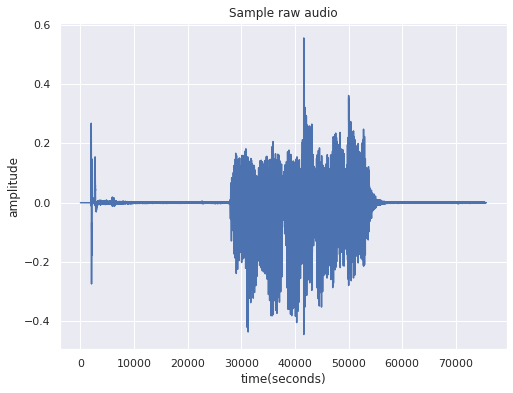

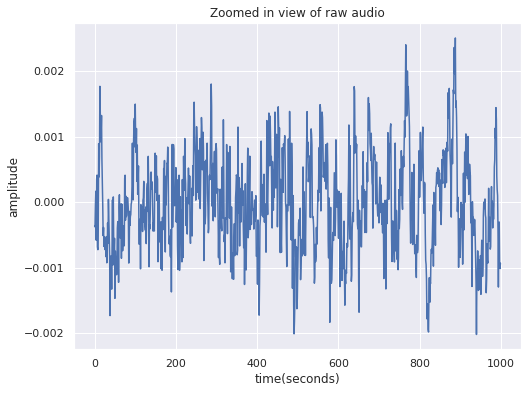

In [ ]:
#looking at basic feature of the audio file, for this we will the 'wave' library

audio= '/content/drive/MyDrive/project_covost/Sl/wav_train/common_voice_sl_17430814.wav'	

data=wave.open(audio, mode='rb')
params = data.getparams()
print(f"Wave parameters: {params}")
print()

#Using librosa library
y, sr = librosa.load(audio) #note librosa default resamples at 22050 Hz
print(f'Audio signal numpy array - "y":{y}')
print(f'Shape of y: {y.shape}')
print(f'Sample_rate: {sr}') #note librosa default resamples at 22050 Hz

pd.Series(y).plot(figsize=(8,6), title="Sample raw audio", xlabel='time(seconds)', ylabel='amplitude')
plt.show()

print()
pd.Series(y[20000:21000]).plot(figsize=(8,6), title="Zoomed in view of raw audio", xlabel='time(seconds)', ylabel='amplitude')
plt.show()

Wave parameters: _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=171648, comptype='NONE', compname='not compressed')

Audio signal numpy array - "y":[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.41085290e-05
  1.42701265e-05  0.00000000e+00]
Shape of y:(78851,)
Sample_rate:22050


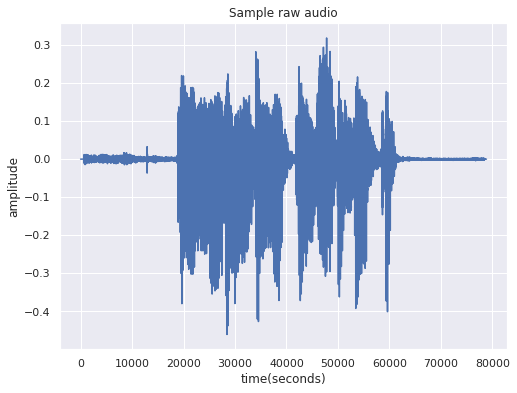

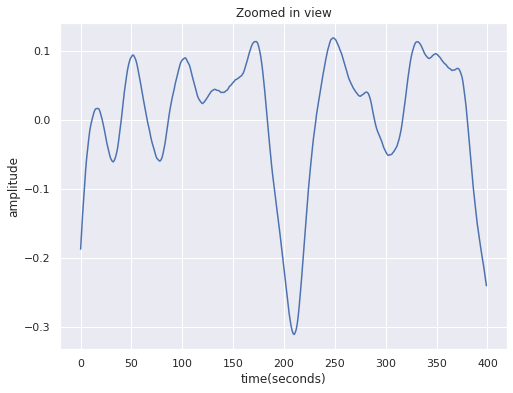

In [ ]:
#another example
#looking at basic fetaures using wave module
audio= '/content/drive/MyDrive/project_covost/Sl/wav_train/common_voice_sl_17430818.wav'

data=wave.open(audio, mode='rb')
params = data.getparams()
print(f"Wave parameters: {params}")


#Using librosa library
y, sr = librosa.load(audio)

print()
print(f'Audio signal numpy array - "y":{y}')
print(f'Shape of y:{y.shape}')
print(f'Sample_rate:{sr}')

pd.Series(y).plot(figsize=(8,6), title="Sample raw audio")
plt.ylabel('amplitude')
plt.xlabel('time(seconds)')
plt.show()


pd.Series(y[30000:30400]).plot(figsize=(8,6), title="Zoomed in view")
plt.ylabel('amplitude')
plt.xlabel('time(seconds)')
plt.show()

Observation:
- number of channels is 1, so its a monochannel wave form
- framerate=48000: 
- sampwidth=2: bytes required to store a single samples
- nframes=137088: number of frames in the audio file

from librosa load: we observe the samplerate tobe 22050. 
Note for processing the waveform, we downsampled to 16000 Hz.

The graphical plots are over time. We can capture the amplitudes when taking samples of the signal over time.

####Duration Analysis

[]

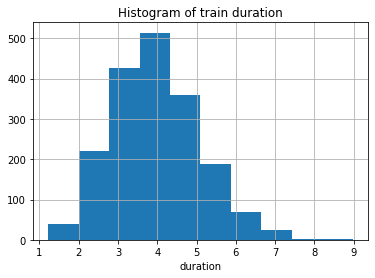

In [ ]:
#plot the histogram of the duration for trian
train_sl_df.duration.hist()
plt.xlabel('duration')
plt.title('Histogram of train duration')
plt.plot()

[]

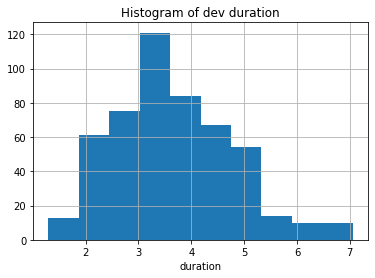

In [ ]:
#plot the histogram of the duration for trian
dev_sl_df.duration.hist()
plt.xlabel('duration')
plt.title('Histogram of dev duration')
plt.plot()

[]

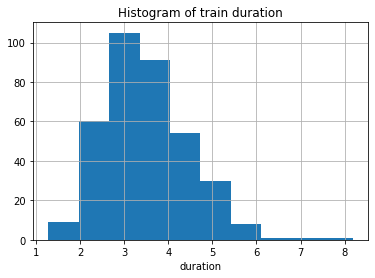

In [ ]:
#plot the histogram of the duration for trian
test_sl_df.duration.hist()
plt.xlabel('duration')
plt.title('Histogram of test duration')
plt.plot()

from the histograms, we observe that most of the audio are less than 6 secs. We will do percentile based analyis on train data to decide on max duration, and hence compute max length of samples

In [ ]:
##print 1 to 100 percentile values with step size of 10. 
for i in range(0, 101, 10):
    print(f"{i}th percentile is {np.percentile(train_sl_df.duration, i)}")

0th percentile is 1.224
10th percentile is 2.568
20th percentile is 3.024
30th percentile is 3.36
40th percentile is 3.624
50th percentile is 3.912
60th percentile is 4.176
70th percentile is 4.512
80th percentile is 4.896
90th percentile is 5.443199999999999
100th percentile is 8.976


In [ ]:
##print 90 to 100 percentile values with step size of 1. 

for i in range(90, 101):
    print(f"{i}th percentile is {np.percentile(train_sl_df.duration, i)}")

90th percentile is 5.443199999999999
91th percentile is 5.52
92th percentile is 5.568
93th percentile is 5.664
94th percentile is 5.784
95th percentile is 5.904
96th percentile is 6.048
97th percentile is 6.16176
98th percentile is 6.483839999999997
99th percentile is 6.8337599999999945
100th percentile is 8.976


Based on the analysis 99th percentile which is approx. 7sec, we will go with max length as sample rate * 7secs = 16000*7 = 112000. Based on this max length, we will have the train samples padded or truncated

In [ ]:
max_length = 112000

In [ ]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

def get_padded_sequence(sample):
      padded_seq = sample.tolist().copy()
      if len(sample) < max_length:
          while len(padded_seq) != max_length:
                padded_seq.append(0)
      if len(sample) > max_length:
          padded_seq = padded_seq[:max_length]
      #print(len(sample))
      
      return np.array(padded_seq)

In [ ]:
#getting train samples padded
train_pad_seq=[]
for sample in train_sl_samples:
    padded_sequence = get_padded_sequence(sample)
    train_pad_seq.append(padded_sequence)

dev_pad_seq=[]
for sample in dev_sl_samples:
    padded_sequence = get_padded_sequence(sample)
    dev_pad_seq.append(padded_sequence)

test_pad_seq=[]
for sample in test_sl_samples:
    padded_sequence = get_padded_sequence(sample)
    test_pad_seq.append(padded_sequence)

In [ ]:
#converting the padded sequence to numpy array
sl_train_pad_seq = np.array(train_pad_seq)
sl_dev_pad_seq = np.array(dev_pad_seq)
sl_test_pad_seq = np.array(test_pad_seq)

In [ ]:
#checking shape
sl_train_pad_seq.shape, sl_dev_pad_seq.shape, sl_test_pad_seq.shape

((1843, 112000), (509, 112000), (360, 112000))

In [ ]:
#saving the files
np.save('/content/drive/MyDrive/project_covost/Sl/sl_train_pad_seq', sl_train_pad_seq)
np.save('/content/drive/MyDrive/project_covost/Sl/sl_dev_pad_seq', sl_dev_pad_seq)
np.save('/content/drive/MyDrive/project_covost/Sl/sl_test_pad_seq', sl_test_pad_seq)

###Extracting Mel spectrogram
Steps to achieve:
- Extract STFT(Short-Time Fourier Transforms)
- Convert amplitude to decibels
- Convert frequencies(Hz) to Mel scale
  - decide number of mel bands - choosing number of mel bands is problem specific. Willgo with as given in CoVoST paper- 80 bands
  - construct mel filter banks
  - apply mel filter banks to spectrogram

Librosa library gives us a function using which does all of the above step in a one line code



Reference: https://brianmcfee.net/dstbook-site/content/ch09-stft/STFT.html
```
STFT
The Short-Time Fourier Transform (STFT) does exactly what it says: 
it applies the Fourier transform to short fragments of time, 
that is, frames taken from a longer signal.
At a conceptual level, there is not too much going on here: 
we just extract frames from the signal, and 
apply the Discrete Fourier Transform to each frame.

Spectrogram
Another way of representing the output of a Short-Time Fourier transform 
is by using spectrograms. Spectrograms are essentially an image representation 
of the STFT, constructed by stacking the frames horizontally, 
so that time can be read left-to-right, and frequency can be read bottom-to-top.
Typically, when we refer to spectrograms, what we actually mean are
magnitude spectrograms, where the phase component has been discarded
and only the DFT magnitudes are retained. 

In Python code, we would say:
# Compute the STFT with frame length = 1024, hop length = 512
stft = basic_stft(x, 1024, 512)

# Take the absolute value to discard phase information
S = np.abs(stft)

While some spectral content will be visually perceptible, 
most of the image would be dark, and it’s generally difficult to read. 
This goes back our earlier discussion of decibels: 
human perception of amplitude is logarithmic, not linear, 
so we should account for this when visualizing spectral content.

Hence we do decibel scaling for amplitudes

```



In [ ]:
FRAME_SIZE=2048
HOP_SIZE=512
SAMPLE_RATE=16000

In [ ]:
#defining a function for prerpocessing  audio returning
def convert_to_spectrogram(data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=data, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, sr=SAMPLE_RATE, n_mels=80)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [ ]:
##use convert_to_spectrogram function to extract the mel spectrogram
## save the numpy arrays
sl_train_melspectrogram = np.array([convert_to_spectrogram(i) for i in sl_train_pad_seq])
sl_dev_melspectrogram = np.array([convert_to_spectrogram(i) for i in sl_dev_pad_seq])
sl_test_melspectrogram = np.array([convert_to_spectrogram(i) for i in sl_test_pad_seq])

In [ ]:
sl_dev_melspectrogram = np.array([convert_to_spectrogram(i) for i in sl_dev_pad_seq])
sl_test_melspectrogram = np.array([convert_to_spectrogram(i) for i in sl_test_pad_seq])

In [ ]:
np.save('/content/drive/MyDrive/project_covost/Sl/sl_train_melspectrogram', sl_train_melspectrogram)
np.save('/content/drive/MyDrive/project_covost/Sl/sl_dev_melspectrogram', sl_dev_melspectrogram)
np.save('/content/drive/MyDrive/project_covost/Sl/sl_test_melspectrogram', sl_test_melspectrogram)

In [ ]:
#verify the train mel spectrogram shape
sl_train_melspectrogram.shape, sl_dev_melspectrogram.shape, sl_test_melspectrogram.shape

((1843, 80, 219), (509, 80, 219), (360, 80, 219))

Viewing Spectrogram

Spectrograms is 3-D data, with frequency in vertical direction, amplitude as color intensity, and time shown along the horizontal axis.

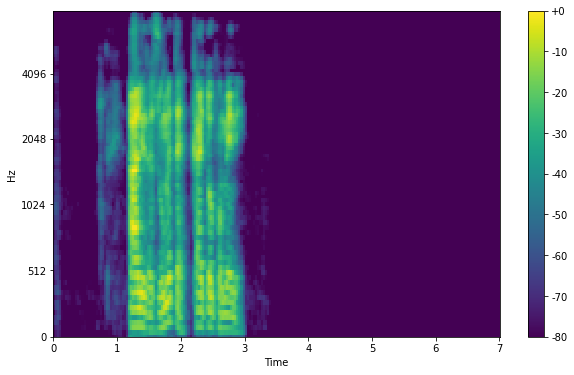

In [ ]:
plt.figure(figsize=(10,6))
librosa.display.specshow(sl_train_melspectrogram[0], x_axis="time", y_axis="mel", sr=SAMPLE_RATE, cmap='viridis')
plt.colorbar(format="%+2.f")
plt.show()

Observation:
- on the y-axis are the mel bands, there should 80 of them
- x-axis gives us the time componenet

# Text Preprocessing

- For ASR(Automatic Speech Recognition) or STT(Speech to text) task, 
  - we will use character vocabularies
- For MT(machine translation) task, we will
  - normalize punctuations
  - build vocabularies with SentencePiece

#### Building Character-level vocabulary for the Speech to Text (ST) translation task

In [ ]:
import tensorflow as tf

In [ ]:
filepath='/content/drive/MyDrive/project_covost/Sl/train_sl_df.tsv'
train_sl_df =pd.read_csv(filepath, 
                   sep='\t', 
                   encoding='utf-8', 
                   escapechar="\\", 
                   quoting=csv.QUOTE_NONE, 
                   na_filter=False)

In [ ]:
train_sl_df.head(1)

,path,sentence,translation,client_id,duration,sample_width,framerate,nframes,id
0,common_voice_sl_17568209.mp3,"Ali razumete, kaj to pomeni?",Do you understand what it means?,7d26e03abe70eab61fd92f13009f3ccf7ae3d332541696...,3.408,2,48000,163584,common_voice_sl_17568209


In [ ]:
train_sl_df.shape

(1843, 9)

Our focus here is the transcript, that is the sentence field:
- convert to lower case
For Specch to text task, we will use character vocabularies ,with 100% coverage of all the characters

In [ ]:
import re

def preprocess_st(text):
    # convert all the text into lower letters
    
    text = text.lower()
    return text

In [ ]:
#reference - https://www.tensorflow.org/text/tutorials/text_generation

#lower casing transcript text
train_transcript_sl =train_sl_df['sentence'].apply(preprocess_st)

# getting all the text
text =""
for t in train_transcript_sl:
    text+=t

print(f"Text: \n{text}")
print()

# unique charcters in text
chars = sorted(set(text))
print(f"The unique charcters are:\n{chars}")
print()

#converting chars to num
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=chars, oov_token="")
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), oov_token="", invert=True)

print(f"Vocab:\n{ids_from_chars.get_vocabulary()}")
print(f"Vocab size: {ids_from_chars.vocabulary_size()}")

Text: 
ali razumete, kaj to pomeni?danes je vreden dva jutri.zelo dobro, zelo dobro.kaj misliš storiti na svoji zemlji?grozdje je bilo stisnjeno v vino.kaj je bilo tako pomembno?življenje je potovanje v negotovost.kaj svetujete, gospod?ne jokaj za razlitim mlekom.to je postalo del kulta v romuniji.kaj je treba storiti?kako si vedel?rad imam karamelne bombone.celo sonce se stara.poskrbite, da boste dobili zdravniško spričevalo!klan se je zbral na vsako dolgočasno noč.majhno je človekovo srce, a neizmerne so njegove želje.prazen žakelj ne stoji pokonci.kakršna njiva, taka repa, kakršen oče, taki otroci.kdaj bo vlak danes prispel?za trgovca je domovina njegov žep.bogastvo je modremu sluga, neumnemu gospodar.zdravko je dirkač.nobena juha se ne poje tako vroča, kakor se skuha.v mladosti so solze brez bolečin, v starosti bolečine brez solz.kaj naj naredimo?kdor izgubi užitek zaradi užitka, ni ničesar izgubil.žice je treba pokriti z gumo.hej, ne gremo tja!nisem jih videl tam.nobene koristi ni

In [ ]:
## function to tokenize text
def tokenize_transcript(text):
    text = preprocess_st(text)
    chars = tf.strings.unicode_split(text, input_encoding="UTF-8")
    tokenized_chars = ids_from_chars(chars)
    return tokenized_chars

In [ ]:
#example sentnece
print(f"Sentence text: {train_sl_df['sentence'][0]}")
print()

print("After Tokenization:")
y=tokenize_transcript(train_sl_df['sentence'][0])
print(f"Tokenized text: {y}")

Sentence text: Ali razumete, kaj to pomeni?

After Tokenization:
Tokenized text: [ 9 20 17  1 25  9 33 28 21 13 27 13  3  1 19  9 18  1 27 23  1 24 23 21
 13 22 17  8]


In [ ]:
#getting back the text
label=tf.strings.reduce_join(chars_from_ids(y)).numpy().decode("utf-8")
label

'ali razumete, kaj to pomeni?'

#### SentencePiece based word tokenization for the Machine translation task

Basic preprocessing of text:
- lower casing
- normalize punctuations

In [ ]:
def preprocess_mt(text):
    # convert all the text into lower letters
    # remove these characters: {'$', ')', '?', '"', '’', '.',  '°', '!', ';', '/', "'", '€', '%', ':', ',', '('}

    text = text.lower()
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    return text

In [ ]:
df_train_mt = train_sl_df[['path', 'sentence', 'translation']]
df_train_mt.sample(2)

,path,sentence,translation
1000,common_voice_sl_17974575.mp3,V Egipt sem šel z babico.,I went to Egypt with my grandmother.
831,common_voice_sl_17917698.mp3,"Kruh bo osnova glavne jedi, razen če se posuši.","Bread will be the basis of the main course, un..."


In [ ]:
#apply the basic preprocessing defined
df_train_mt['sentence']=df_train_mt['sentence'].apply(preprocess_mt)
df_train_mt['translation']=df_train_mt['translation'].apply(preprocess_mt)

In [ ]:
df_train_mt.head()

,path,sentence,translation
0,common_voice_sl_17568209.mp3,ali razumete kaj to pomeni,do you understand what it means
1,common_voice_sl_17568210.mp3,danes je vreden dva jutri,today is worth of two tomorrows
2,common_voice_sl_17568212.mp3,zelo dobro zelo dobro,very good very good
3,common_voice_sl_17568213.mp3,kaj misliš storiti na svoji zemlji,what do you think of doing on your soil
4,common_voice_sl_17568219.mp3,grozdje je bilo stisnjeno v vino,the grapes were compressed into wine


Installing SentencePiece

In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 2.2 MB/s 


Building SentencePiece tokenizer model: we can build a combined vocabulary here, example here i am doing bilingual translation, Slovenian to English, one vocabulary will be generated with compibine train corpus of Slovenian and English text

This combined text data would be passed to SentencePieceTrainer.Train() method to generate a model. We can pass text data as list of texts or as Input.txt file with each text in separate line. 

We can tokenize based on different algorithms, the default is -'unigram' and the one used in the research paper baseline is BPE-Byte Pair Encoding, we will use the same.


In [ ]:
text_list = pd.concat([df_train_mt['sentence'], df_train_mt['translation']], axis = 0).tolist()

- Algorithm: 'bpe' Byte Pair Encoding

In [ ]:
import sentencepiece as spm

#train senetencepiece model from our train text
spm.SentencePieceTrainer.Train(sentence_iterator=iter(text_list), model_prefix='sp_st', pad_id=0, unk_id=1, bos_id=2, eos_id=3, model_type='bpe')

#create processor instance and load the model file
sp=spm.SentencePieceProcessor()
sp.load('sp_st.model')

True

The above outputs the model and the vocabulary as sp_st.model and sp_st.vocab

English text example - encoding and decoding using the model

In [ ]:
#encode text
print(sp.encode_as_pieces('do you understand what it means'))
print(sp.encode_as_ids('do you understand what it means'))

['▁do', '▁you', '▁understand', '▁what', '▁it', '▁means']
[46, 57, 1332, 115, 80, 3083]


In [ ]:
#decode text
print(sp.decode_pieces(['▁do', '▁you', '▁understand', '▁what', '▁it', '▁means']))
print(sp.decode_ids([46, 57, 1332, 115, 80, 3083]))

do you understand what it means
do you understand what it means


Slovenian text example - encoding and decoding

In [ ]:
#encode text
print(sp.encode_as_pieces('ali razumete kaj to pomeni'))
print(sp.encode_as_ids('ali razumete kaj to pomeni'))

#decode text
print(sp.decode_pieces(['▁ali', '▁razumete', '▁kaj', '▁to', '▁pomeni']))
print(sp.decode_ids([286, 5343, 148, 38, 1325]))

['▁ali', '▁razumete', '▁kaj', '▁to', '▁pomeni']
[286, 5343, 148, 38, 1325]
ali razumete kaj to pomeni
ali razumete kaj to pomeni


We can also get the vocabulary from sentencepiece model

In [ ]:
vocab = [sp.id_to_piece(id) for id in range(sp.get_piece_size())]

In [ ]:
print(vocab)

['<pad>', '<unk>', '<s>', '</s>', '▁t', '▁s', '▁i', '▁n', '▁a', '▁p', 're', 'he', 'je', '▁w', '▁d', '▁b', '▁o', '▁m', 've', '▁l', '▁k', '▁the', 'in', 'an', '▁je', 'at', 'en', '▁h', 'ou', 'or', '▁v', 'st', 'ar', 'il', '▁c', 'it', '▁z', 'ra', '▁to', 'es', '▁g', '▁f', '▁is', 'el', 'er', 'ot', '▁do', '▁y', '▁th', '▁ne', 'is', 'aj', 'ro', 'ed', '▁po', 'ko', 'as', '▁you', '▁se', 'al', '▁in', 'ri', 'on', 'et', 'ing', '▁st', 'li', 'am', '▁wh', 'ad', '▁u', 'im', '▁e', 'ak', 'no', '▁na', '▁an', 'od', 'ic', 'le', '▁it', 'om', '▁he', '▁ve', 'ju', '▁of', '▁č', 'ne', '▁not', 'ol', 'ja', '▁be', 'ove', 'ni', '▁re', '▁li', '▁za', 'ay', 'id', 'ke', 'ov', 'se', 'ru', 'la', '▁mo', 'ga', 'ce', '▁ni', '▁and', '▁ž', 'na', '▁on', 'jo', '▁are', 'ith', '▁what', '▁with', '▁la', 'ka', 'ut', '▁bo', '▁we', '▁so', 'vo', '▁pre', '▁pri', '▁ra', '▁this', '▁me', '▁no', '▁ha', 'ver', 'ir', '▁go', 'lo', '▁for', 'ite', '▁sp', 'em', 'ly', '▁iz', '▁od', '▁bil', '▁that', 'di', '▁da', 'iti', 'ill', '▁kaj', '▁ob', '▁lju', '▁le'

Will be using the created tokenizer model in tensorflow pipeline

In [ ]:
!pip install tensorflow-text

In [ ]:
from tensorflow.python.platform import gfile
from tensorflow_text import SentencepieceTokenizer, pad_model_inputs

In [ ]:
model=gfile.GFile('/content/sp_st.model', 'rb').read()
sp_tokenizer = SentencepieceTokenizer(model=model)

In [ ]:
sp_tokenizer.tokenize(['do you understand what it means'])

<tf.RaggedTensor [[46, 57, 1332, 115, 80, 3083]]>

In [ ]:
sp_tokenizer.

Next step: DATASET PREPARATION using the above function and tokenizers for Speech Translation task and Machine Translation task

MT - Bilingual translation models
Slovenian -> English
Welsh -> English
Swedish -> English
Latvian -> English
